# Data

- $C=\{1,2,3,4,5,6,7,8\}$ $\leftarrow$ set of cities to visit.

- $n = 8$ $\leftarrow$ number of cities.

- $T = (1,2,3,4,5,6,7,8)$ $\leftarrow$ current tour.

In [1]:
tour = [1, 2, 3, 4, 5, 6, 7, 8]

 - Coordinates of each city:

In [2]:
coords = (
    # x   y    city
    (86, 37), # 1
    (17, 94), # 2
    ( 3, 65), # 3
    (48, 43), # 4
    (78, 70), # 5
    (17, 55), # 6
    (62, 91), # 7
    (78, 91)  # 8
)

- $D=(d_{ij})$, $i,j \in C$ $\leftarrow$ matrix of distances between cities.

In [3]:
import math
distances = [
    [
        int(math.hypot(abs(coords[i][0] - coords[j][0]), abs(coords[i][1] - coords[j][1])))
        if i != j else 0
        for j in range(len(coords))
    ]
    for i in range(len(coords))
]
distances

[[0, 89, 87, 38, 33, 71, 59, 54],
 [89, 0, 32, 59, 65, 39, 45, 61],
 [87, 32, 0, 50, 75, 17, 64, 79],
 [38, 59, 50, 0, 40, 33, 50, 56],
 [33, 65, 75, 40, 0, 62, 26, 21],
 [71, 39, 17, 33, 62, 0, 57, 70],
 [59, 45, 64, 50, 26, 57, 0, 16],
 [54, 61, 79, 56, 21, 70, 16, 0]]

# Objective

The objective is to get a tour $T$ that visits all cities in $C$, ending with the first city, such that the total distance of the tour is as minimal as possible.

$$
\begin{aligned}
& \underset{t \in T}{\text{min}}
& & \sum_{i=1}^{n} d_{t_i t_{i+1}}
\end{aligned}
$$

We already have a feasible solution, our current tour $T$, so we are going to use the *2-opt* heuristic to try to improve the tour according to the objective function, that is, to reduce the total distance.

Let's create a function to calculate the total cost (distance) of the tour:

In [4]:
def dist():
    return sum(distances[tour[i] - 1][tour[i + 1] - 1] for i in range(len(tour) - 1)) + distances[tour[-1] - 1][tour[0] - 1]

# Plotting

In order to illustrate each selected neighbor, we will declare a function to make the corresponding plot for every iteration:

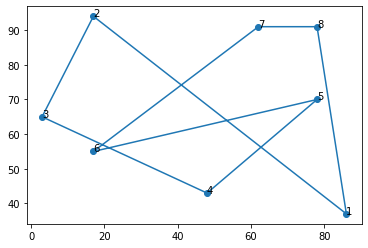

In [5]:
import matplotlib.pyplot as plt
def plot_tour():
    '''Plots the tour.'''
    x_coords = [c[0] for c in coords]
    y_coords = [c[1] for c in coords]
    plt.scatter(x_coords, y_coords)
    for city, tag in enumerate(i+1 for i in range(8)):
        plt.annotate(tag, (x_coords[city], y_coords[city]))
    global tour
    sorted_coords = [coords[k] for k in (t - 1 for t in tour + [tour[0]])]
    x_values = [c[0] for c in sorted_coords]
    y_values = [c[1] for c in sorted_coords]
    plt.plot(x_values, y_values)
    plt.show()

%matplotlib inline
plot_tour()

# *2-opt*

The *2-opt* algorithm is a local search heuristic that consist in selecting two edges and swapping their nodes, e.g. $(a,b),(c,d) \rightarrow (a,c),(b,d)$. If the resulting tour has a lower cost, then it becomes the current solution. This is repeated until no improvement has been made.

Let's create a function to reverse the order of the cities between indexes $b$ and $c$ (following the example above), including both. This is the same as swapping the nodes of two edges:

In [6]:
def swap(b, c):
    '''Performs the 2-opt algorithm.'''
    subtour = tour[b:c+1]
    return tour[:b] + subtour[::-1] + tour[c+1:]

The neighborhood of the current tour is formed by every possible combination of swapping non-adjacent edge pairs. If we don't take into account the neighbors that have the same order as the tour, the size of the neighborhood is given by the formula:
$$\frac{n(n-3)}{2}$$
where $n$ is the number of cities to visit. In this instance that number is $8$, so each possible tour has $20$ neighbors.

Now let's create a function to calculate and print the difference in cost of a neighbor against the current tour, that is, $\Delta x$.

In [7]:
def show_dx(swapped, b, c):
    '''Shows delta X of swapped tour.'''
    a = 7 if b == 0 else b - 1
    d = 0 if c == 7 else c + 1
    removed_edges = distances[tour[a] - 1][tour[b] - 1] + distances[tour[c] - 1][tour[d] - 1]
    new_edges = distances[swapped[a] - 1][swapped[b] - 1] + distances[swapped[c] - 1][swapped[d] - 1]
    dx = new_edges - removed_edges
    print(f'{swapped} {dx:7g}')
    return dx

The lower the $\Delta x$, the better the neighbor, because it indicates how much units of distance that neighbor adds, so if it's a negative value then it's decreasing the total cost.

## Best Found Strategy

The BFS consists in calculating the $\Delta x$ for every neighbor and selecting the one that makes the best improvement.

Let's define a function to show all the neighbors and calculate their $\Delta x$. This function should print the 20 neighbors of each tour:

In [8]:
def bfs():
    '''Shows all the neighbors of the current tour.'''
    for i in range(len(tour)):
        for j in range(i + 1, len(tour) - 1):
            neighbor = swap(i, j)
            show_dx(neighbor, i, j)

### First iteration

We will call the BFS function to see which neighbor of $T$ makes the best improvement:

In [9]:
bfs()

[2, 1, 3, 4, 5, 6, 7, 8]      62
[3, 2, 1, 4, 5, 6, 7, 8]      13
[4, 3, 2, 1, 5, 6, 7, 8]      -5
[5, 4, 3, 2, 1, 6, 7, 8]     -24
[6, 5, 4, 3, 2, 1, 7, 8]      18
[7, 6, 5, 4, 3, 2, 1, 8]       0
[1, 3, 2, 4, 5, 6, 7, 8]       7
[1, 4, 3, 2, 5, 6, 7, 8]     -26
[1, 5, 4, 3, 2, 6, 7, 8]     -79
[1, 6, 5, 4, 3, 2, 7, 8]     -30
[1, 7, 6, 5, 4, 3, 2, 8]      15
[1, 2, 4, 3, 5, 6, 7, 8]      62
[1, 2, 5, 4, 3, 6, 7, 8]     -12
[1, 2, 6, 5, 4, 3, 7, 8]      14
[1, 2, 7, 6, 5, 4, 3, 8]      76
[1, 2, 3, 5, 4, 6, 7, 8]      -4
[1, 2, 3, 6, 5, 4, 7, 8]     -40
[1, 2, 3, 7, 6, 5, 4, 8]      54
[1, 2, 3, 4, 6, 5, 7, 8]     -38
[1, 2, 3, 4, 7, 6, 5, 8]      15
[1, 2, 3, 4, 5, 7, 6, 8]      18


As we can see, the lowest $\Delta x$ reduces total cost by $79$ units, so we move the solution to its corresponding tour: $T \leftarrow (1, 5, 4, 3, 2, 6, 7, 8)$.

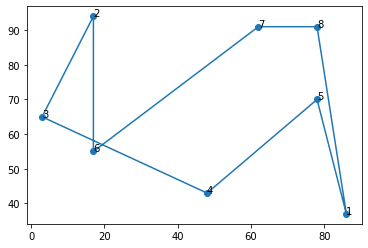

In [10]:
tour = [1, 5, 4, 3, 2, 6, 7, 8]
plot_tour()

We can observe that edges $(1,2)$ and $(5,6)$ were swapped.

### Second iteration

Let's see if we can improve the tour:

In [11]:
bfs()

[5, 1, 4, 3, 2, 6, 7, 8]     -35
[4, 5, 1, 3, 2, 6, 7, 8]      39
[3, 4, 5, 1, 2, 6, 7, 8]      82
[2, 3, 4, 5, 1, 6, 7, 8]      39
[6, 2, 3, 4, 5, 1, 7, 8]      18
[7, 6, 2, 3, 4, 5, 1, 8]       0
[1, 4, 5, 3, 2, 6, 7, 8]      30
[1, 3, 4, 5, 2, 6, 7, 8]      87
[1, 2, 3, 4, 5, 6, 7, 8]      79
[1, 6, 2, 3, 4, 5, 7, 8]       7
[1, 7, 6, 2, 3, 4, 5, 8]      31
[1, 5, 3, 4, 2, 6, 7, 8]      62
[1, 5, 2, 3, 4, 6, 7, 8]      19
[1, 5, 6, 2, 3, 4, 7, 8]      15
[1, 5, 7, 6, 2, 3, 4, 8]      26
[1, 5, 4, 2, 3, 6, 7, 8]     -13
[1, 5, 4, 6, 2, 3, 7, 8]     -10
[1, 5, 4, 7, 6, 2, 3, 8]      63
[1, 5, 4, 3, 6, 2, 7, 8]     -27
[1, 5, 4, 3, 7, 6, 2, 8]      77
[1, 5, 4, 3, 2, 7, 6, 8]      60


Indeed we can, the lowest $\Delta x$ is now $-35$. We can observe that only a few neighbors are better than the tour this time. The solution moves to $(5, 1, 4, 3, 2, 6, 7, 8)$.

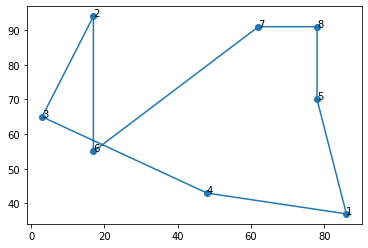

In [12]:
tour = [5, 1, 4, 3, 2, 6, 7, 8]
plot_tour()

In this iteration, edges $(8,1)$ and $(5,4)$ were swapped.

### Third iteration

Let's check again the best neighbor by calling the BFS function:

In [13]:
bfs()

[1, 5, 4, 3, 2, 6, 7, 8]      35
[4, 1, 5, 3, 2, 6, 7, 8]      60
[3, 4, 1, 5, 2, 6, 7, 8]      91
[2, 3, 4, 1, 5, 6, 7, 8]      63
[6, 2, 3, 4, 1, 5, 7, 8]      18
[7, 6, 2, 3, 4, 1, 5, 8]       0
[5, 4, 1, 3, 2, 6, 7, 8]      44
[5, 3, 4, 1, 2, 6, 7, 8]      99
[5, 2, 3, 4, 1, 6, 7, 8]      64
[5, 6, 2, 3, 4, 1, 7, 8]      31
[5, 7, 6, 2, 3, 4, 1, 8]      31
[5, 1, 3, 4, 2, 6, 7, 8]      76
[5, 1, 2, 3, 4, 6, 7, 8]      45
[5, 1, 6, 2, 3, 4, 7, 8]      26
[5, 1, 7, 6, 2, 3, 4, 8]      61
[5, 1, 4, 2, 3, 6, 7, 8]     -13
[5, 1, 4, 6, 2, 3, 7, 8]     -10
[5, 1, 4, 7, 6, 2, 3, 8]      63
[5, 1, 4, 3, 6, 2, 7, 8]     -27
[5, 1, 4, 3, 7, 6, 2, 8]      77
[5, 1, 4, 3, 2, 7, 6, 8]      60


The lowest $\Delta x$ is $-27$ so the tour moves to its neighbor: $T \leftarrow (5, 1, 4, 3, 6, 2, 7, 8)$.

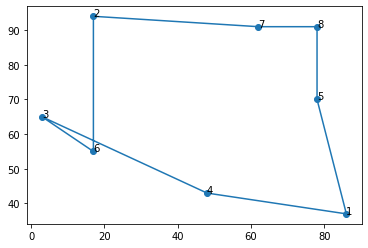

In [14]:
tour = [5, 1, 4, 3, 6, 2, 7, 8]
plot_tour()

We can see that edges $(3,2)$ and $(6,7)$ were swapped.

### Fourth iteration

We will choose the best neighbor according to its $\Delta x$:

In [15]:
bfs()

[1, 5, 4, 3, 6, 2, 7, 8]      35
[4, 1, 5, 3, 6, 2, 7, 8]      60
[3, 4, 1, 5, 6, 2, 7, 8]     103
[6, 3, 4, 1, 5, 2, 7, 8]      75
[2, 6, 3, 4, 1, 5, 7, 8]      21
[7, 2, 6, 3, 4, 1, 5, 8]       0
[5, 4, 1, 3, 6, 2, 7, 8]      44
[5, 3, 4, 1, 6, 2, 7, 8]      96
[5, 6, 3, 4, 1, 2, 7, 8]      79
[5, 2, 6, 3, 4, 1, 7, 8]      46
[5, 7, 2, 6, 3, 4, 1, 8]      31
[5, 1, 3, 4, 6, 2, 7, 8]      65
[5, 1, 6, 3, 4, 2, 7, 8]      53
[5, 1, 2, 6, 3, 4, 7, 8]      56
[5, 1, 7, 2, 6, 3, 4, 8]      61
[5, 1, 4, 6, 3, 2, 7, 8]     -24
[5, 1, 4, 2, 6, 3, 7, 8]      28
[5, 1, 4, 7, 2, 6, 3, 8]      63
[5, 1, 4, 3, 2, 6, 7, 8]      27
[5, 1, 4, 3, 7, 2, 6, 8]     101
[5, 1, 4, 3, 6, 7, 2, 8]      63


We can see that the lowest value of $\Delta x$ is getting smaller every iteration. This time it reduces the tour's cost by $24$ units. Updating the tour: $T \leftarrow (5, 1, 4, 6, 3, 2, 7, 8)$.

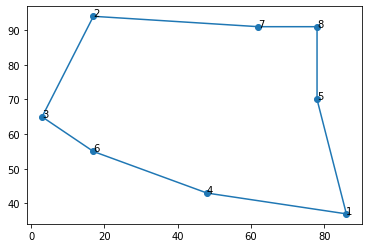

In [16]:
tour = [5, 1, 4, 6, 3, 2, 7, 8]
plot_tour()

Edges $(4,3)$ and $(6,2)$ were swapped this time.

### Fifth iteration

Let's try to improve our current solution by moving it to one of its neighbors:

In [17]:
bfs()

[1, 5, 4, 6, 3, 2, 7, 8]      35
[4, 1, 5, 6, 3, 2, 7, 8]      64
[6, 4, 1, 5, 3, 2, 7, 8]     107
[3, 6, 4, 1, 5, 2, 7, 8]      91
[2, 3, 6, 4, 1, 5, 7, 8]      21
[7, 2, 3, 6, 4, 1, 5, 8]       0
[5, 4, 1, 6, 3, 2, 7, 8]      45
[5, 6, 4, 1, 3, 2, 7, 8]      99
[5, 3, 6, 4, 1, 2, 7, 8]      99
[5, 2, 3, 6, 4, 1, 7, 8]      46
[5, 7, 2, 3, 6, 4, 1, 8]      31
[5, 1, 6, 4, 3, 2, 7, 8]      66
[5, 1, 3, 6, 4, 2, 7, 8]      76
[5, 1, 2, 3, 6, 4, 7, 8]      56
[5, 1, 7, 2, 3, 6, 4, 8]      61
[5, 1, 4, 3, 6, 2, 7, 8]      24
[5, 1, 4, 2, 3, 6, 7, 8]      38
[5, 1, 4, 7, 2, 3, 6, 8]      71
[5, 1, 4, 6, 2, 3, 7, 8]      41
[5, 1, 4, 6, 7, 2, 3, 8]     103
[5, 1, 4, 6, 3, 7, 2, 8]      77


No neighbor can improve the tour, as we can confirm by looking at the $\Delta x$ column, none of them is less than 0. This means that we have reached a local optimal.

Using the Best Found Strategy of the *2-opt* heuristic, we get the solution $T = (5, 1, 4, 6, 3, 2, 7, 8)$ after 4 iterations. Let's calculate its total cost:

In [18]:
dist()

235

The local optimal solution $T$ has a cost of $235$ units of distance.

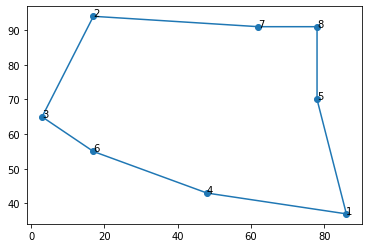

In [19]:
plot_tour()

## First Found Strategy

In the FFS, the solution moves to the first neighbor that would improve the tour. It doesn't matter if there were neighbors left to be evaluated. As the BFS, this repeats until the neighborhood has been explored without any improvement.

We are going to use a function that will evaluate a neighbor. If it improves the solution, no more neighbors will be evaluated, otherwise the next neighbor will be evaluated, and so on until the whole neighborhood is explored.

In [20]:
def ffs():
    '''Show evaluated neighbors until improvement.'''
    for i in range(len(tour)):
        for j in range(i + 1, len(tour) - 1):
            neighbor = swap(i, j)
            if show_dx(neighbor, i, j) < 0:
                return

We can observe that the function is almost identical to `bfs()`. The only difference is that `ffs()` finishes earlier if an improvement is found.

Before using the FFS, let's restart our tour as we had it before using the BFS: $T \leftarrow (1,2,3,4,5,6,7,8)$.

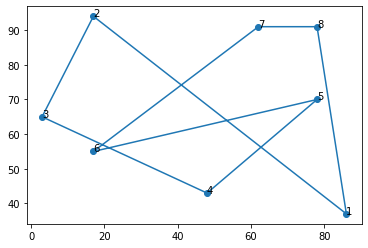

In [21]:
tour = [1, 2, 3, 4, 5, 6, 7, 8]
plot_tour()

### First iteration

Let's see how many neighbors are evaluated before an improvement is found:

In [22]:
ffs()

[2, 1, 3, 4, 5, 6, 7, 8]      62
[3, 2, 1, 4, 5, 6, 7, 8]      13
[4, 3, 2, 1, 5, 6, 7, 8]      -5


Only two and then the improvement. It's a small improvement, $\Delta x$ only reduces the cost by $5$ units, but very few evaluations were made. Now we move our solution: $T \leftarrow (4, 3, 2, 1, 5, 6, 7, 8)$. At this point, the local search using FFS takes a different movement from BFS.

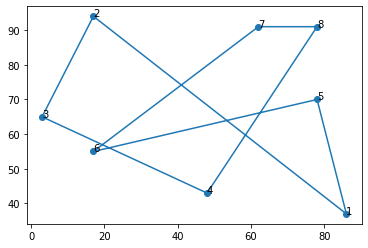

In [23]:
tour = [4, 3, 2, 1, 5, 6, 7, 8]
plot_tour()

Edges $(8,1)$ and $(4,5)$ were swapped.

### Second iteration

Let's evaluate the neighbors of $T$ so we can improve it:

In [24]:
ffs()

[3, 4, 2, 1, 5, 6, 7, 8]      50
[2, 3, 4, 1, 5, 6, 7, 8]     -46


The better neighbor has a $\Delta x$ of $-46$ and was quickly found. This is a far better improvement than the previous one. The tour moves to that neighbor: $T \leftarrow (2, 3, 4, 1, 5, 6, 7, 8)$.

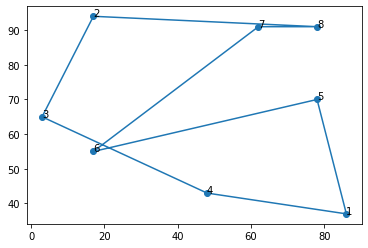

In [25]:
tour = [2, 3, 4, 1, 5, 6, 7, 8]
plot_tour()

We can see that the algorithm swapped edges $(8,4)$ and $(2,1)$.

### Third iteration

We will again search for a better solution by calling the FFS function:

In [26]:
ffs()

[3, 2, 4, 1, 5, 6, 7, 8]      27
[4, 3, 2, 1, 5, 6, 7, 8]      46
[1, 4, 3, 2, 5, 6, 7, 8]      25
[5, 1, 4, 3, 2, 6, 7, 8]     -63


The first improvement found reduces the tour cost by $63$ units. Let's move the solution to it: $T \leftarrow (5, 1, 4, 3, 2, 6, 7, 8)$.

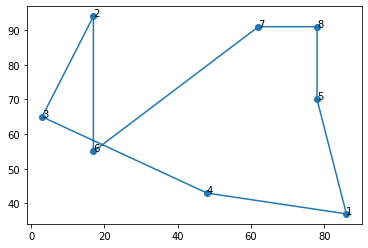

In [27]:
tour = [5, 1, 4, 3, 2, 6, 7, 8]
plot_tour()

This time, edges $(8,2)$ and $(5,6)$ were swapped.

### Fourth iteration

Let's see if we can still improve the solution:

In [28]:
ffs()

[1, 5, 4, 3, 2, 6, 7, 8]      35
[4, 1, 5, 3, 2, 6, 7, 8]      60
[3, 4, 1, 5, 2, 6, 7, 8]      91
[2, 3, 4, 1, 5, 6, 7, 8]      63
[6, 2, 3, 4, 1, 5, 7, 8]      18
[7, 6, 2, 3, 4, 1, 5, 8]       0
[5, 4, 1, 3, 2, 6, 7, 8]      44
[5, 3, 4, 1, 2, 6, 7, 8]      99
[5, 2, 3, 4, 1, 6, 7, 8]      64
[5, 6, 2, 3, 4, 1, 7, 8]      31
[5, 7, 6, 2, 3, 4, 1, 8]      31
[5, 1, 3, 4, 2, 6, 7, 8]      76
[5, 1, 2, 3, 4, 6, 7, 8]      45
[5, 1, 6, 2, 3, 4, 7, 8]      26
[5, 1, 7, 6, 2, 3, 4, 8]      61
[5, 1, 4, 2, 3, 6, 7, 8]     -13


Of course we can. The chosen neighbor has a $\Delta x$ of $-13$. We can see that this time, the algorithm had to explore more than the past iterations. The tour now moves to $(5, 1, 4, 2, 3, 6, 7, 8)$.

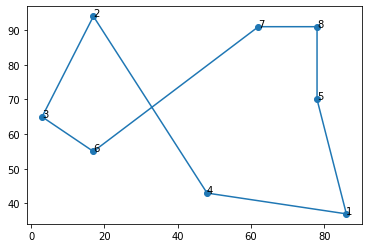

In [29]:
tour = [5, 1, 4, 2, 3, 6, 7, 8]
plot_tour()

Edges $(4,3)$ and $(2,6)$ were swapped.

### Fifth iteration

We will call the FFS function to again explore the neighborhood in search for an improvement.

In [30]:
ffs()

[1, 5, 4, 2, 3, 6, 7, 8]      35
[4, 1, 5, 2, 3, 6, 7, 8]      41
[2, 4, 1, 5, 3, 6, 7, 8]      83
[3, 2, 4, 1, 5, 6, 7, 8]     103
[6, 3, 2, 4, 1, 5, 7, 8]      18
[7, 6, 3, 2, 4, 1, 5, 8]       0
[5, 4, 1, 2, 3, 6, 7, 8]      37
[5, 2, 4, 1, 3, 6, 7, 8]      87
[5, 3, 2, 4, 1, 6, 7, 8]      96
[5, 6, 3, 2, 4, 1, 7, 8]      31
[5, 7, 6, 3, 2, 4, 1, 8]      31
[5, 1, 2, 4, 3, 6, 7, 8]      69
[5, 1, 3, 2, 4, 6, 7, 8]      65
[5, 1, 6, 3, 2, 4, 7, 8]      26
[5, 1, 7, 6, 3, 2, 4, 8]      61
[5, 1, 4, 3, 2, 6, 7, 8]      13
[5, 1, 4, 6, 3, 2, 7, 8]     -38


The first better $\Delta x$ is $-38$. Let's move the solution to the neighbor that applies this improvement: $T \leftarrow (5, 1, 4, 6, 3, 2, 7, 8)$.

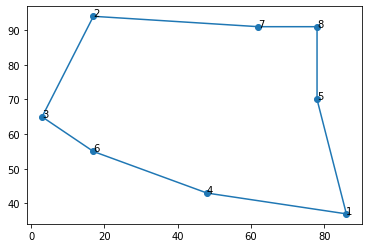

In [31]:
tour = [5, 1, 4, 6, 3, 2, 7, 8]
plot_tour()

Edges $(4,2)$ and $(6,7)$ were swapped this time.

### Sixth iteration

The last movement got the same solution as the last iteration of BFS. Let's check whether or not the FFS algorithm will finish there too:

In [32]:
ffs()

[1, 5, 4, 6, 3, 2, 7, 8]      35
[4, 1, 5, 6, 3, 2, 7, 8]      64
[6, 4, 1, 5, 3, 2, 7, 8]     107
[3, 6, 4, 1, 5, 2, 7, 8]      91
[2, 3, 6, 4, 1, 5, 7, 8]      21
[7, 2, 3, 6, 4, 1, 5, 8]       0
[5, 4, 1, 6, 3, 2, 7, 8]      45
[5, 6, 4, 1, 3, 2, 7, 8]      99
[5, 3, 6, 4, 1, 2, 7, 8]      99
[5, 2, 3, 6, 4, 1, 7, 8]      46
[5, 7, 2, 3, 6, 4, 1, 8]      31
[5, 1, 6, 4, 3, 2, 7, 8]      66
[5, 1, 3, 6, 4, 2, 7, 8]      76
[5, 1, 2, 3, 6, 4, 7, 8]      56
[5, 1, 7, 2, 3, 6, 4, 8]      61
[5, 1, 4, 3, 6, 2, 7, 8]      24
[5, 1, 4, 2, 3, 6, 7, 8]      38
[5, 1, 4, 7, 2, 3, 6, 8]      71
[5, 1, 4, 6, 2, 3, 7, 8]      41
[5, 1, 4, 6, 7, 2, 3, 8]     103
[5, 1, 4, 6, 3, 7, 2, 8]      77


The whole neighborhood was explored without any improvement. Both strategies come to an end with the same solution, $T \leftarrow (5, 1, 4, 6, 3, 2, 7, 8)$, which has a total travel cost of $235$.

## Conclusion

Both strategies give the same local optimal solution in this instance. The FFS took one more iteration than the BFS, but the latter performed more calculations of $\Delta x$. Very big instances may take too much time and effort using BFS, but on the other hand, using FFS may take too many iterations. The decision of which strategy can be made by running some tests to have statistical evidence of which one is better for a given problem or for a specific instance.